# Carga de librerías

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay
matplotlib.pyplot.show()
warnings.filterwarnings('ignore')

# Lectura de los datos.

In [2]:
data = pd.read_csv("./heart.csv")
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Las variables que contiene el dataset seleccionado son las siguientes:
* <strong>Age: </strong> Edad del paciente.
* <strong>Sex: </strong> Sexo del paciente.
* <strong>cp: </strong> Tipo de dolor en el pecho
    * <strong>0: </strong> Angina típica.
    * <strong>1: </strong> Angina Atípica.
    * <strong>2: </strong> Dolor distinto a angina.
    * <strong>3: </strong> Asintomático.
* <strong>trtbps:</strong> Presión arterial en reposo (mm/Hg).
* <strong>chol:</strong> Colesterol (mg/dl) obtenido a través del sensor BMI.
* <strong>fbs:</strong> Azúcar en sangre en ayunas superior a 120 mg/dl. 
    * <strong>0: </strong> Falso.
    * <strong>1: </strong> Verdadero.
* <strong>restecg:</strong> Resultados electrocardiográficos en reposo.
    * <strong>0:</strong> Normal.
    * <strong>1:</strong> Anomalías en la onda ST-T (inversiones de la onda T y/o elevación o depresión del ST > 0,05 mV).
    * <strong>2:</strong> Muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de "Estes".
* <strong>thalach:</strong> Frecuencia cardíaca máxima alcanzada.
* <strong>exang:</strong> Angina inducida por el ejercicio.
    * <strong>0: </strong> No.
    * <strong>1: </strong> Sí.
* <strong>oldpeak:</strong> Pico anterior.
* <strong>slp:</strong> Pendiente.
* <strong>caa:</strong> Número de vasos principales (0-3).
* <strong>thall:</strong> Tasa tal.
* <strong>output:</strong> Salida a obtener.
    * <strong>0: </strong> Menos probabilidad de tener un ataque.
    * <strong>1: </strong> Más probabilidad de tener un ataque.

Según he podido observar en la página de ["Métodos Computacionales y Matemáticos en Medicina"](https://www.hindawi.com/journals/cmmm/2017/8272091/tab1/), los valores en los que se tienen que hayar las variables numéricas son los siguientes:
* <strong>Age: </strong> [29 – 77].
* <strong>trtbps:</strong> [94 – 200].
* <strong>chol:</strong> [126 – 564].
* <strong>thalach:</strong> [71 – 202].
* <strong>oldpeak:</strong> [0 – 6.2].
* <strong>slp:</strong> [1, 2, 3].
Y tal y como se muestra en el siguiente punto todos cumplen con estos requisitos, por lo que en principio no habrá valores erróneos.

# Descripción estadística.

In [3]:
# Resumen estadístico del conjunto de datos.
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Nulos y ceros.

In [4]:
# Obtener nans.
print("Número de NaNs encontrados.")
for column in data.columns:
    nans = data[column][data[column].isna()].count()
    print("   - '{}': {}.  ".format(column, nans))

Número de NaNs encontrados.
   - 'age': 0.  
   - 'sex': 0.  
   - 'cp': 0.  
   - 'trtbps': 0.  
   - 'chol': 0.  
   - 'fbs': 0.  
   - 'restecg': 0.  
   - 'thalachh': 0.  
   - 'exng': 0.  
   - 'oldpeak': 0.  
   - 'slp': 0.  
   - 'caa': 0.  
   - 'thall': 0.  
   - 'output': 0.  


In [5]:
# Obtener ceros.
columns_to_find = ["age", "trtbps", "chol", "thalachh", "oldpeak", "slp", "thall"]
print("Número de ceros encontrados.")
for column in columns_to_find:
    nans = data[column][data[column] == 0].count()
    print("   - '{}': {}.".format(column, nans))

Número de ceros encontrados.
   - 'age': 0.
   - 'trtbps': 0.
   - 'chol': 0.
   - 'thalachh': 0.
   - 'oldpeak': 99.
   - 'slp': 21.
   - 'thall': 2.


# Correlación general.


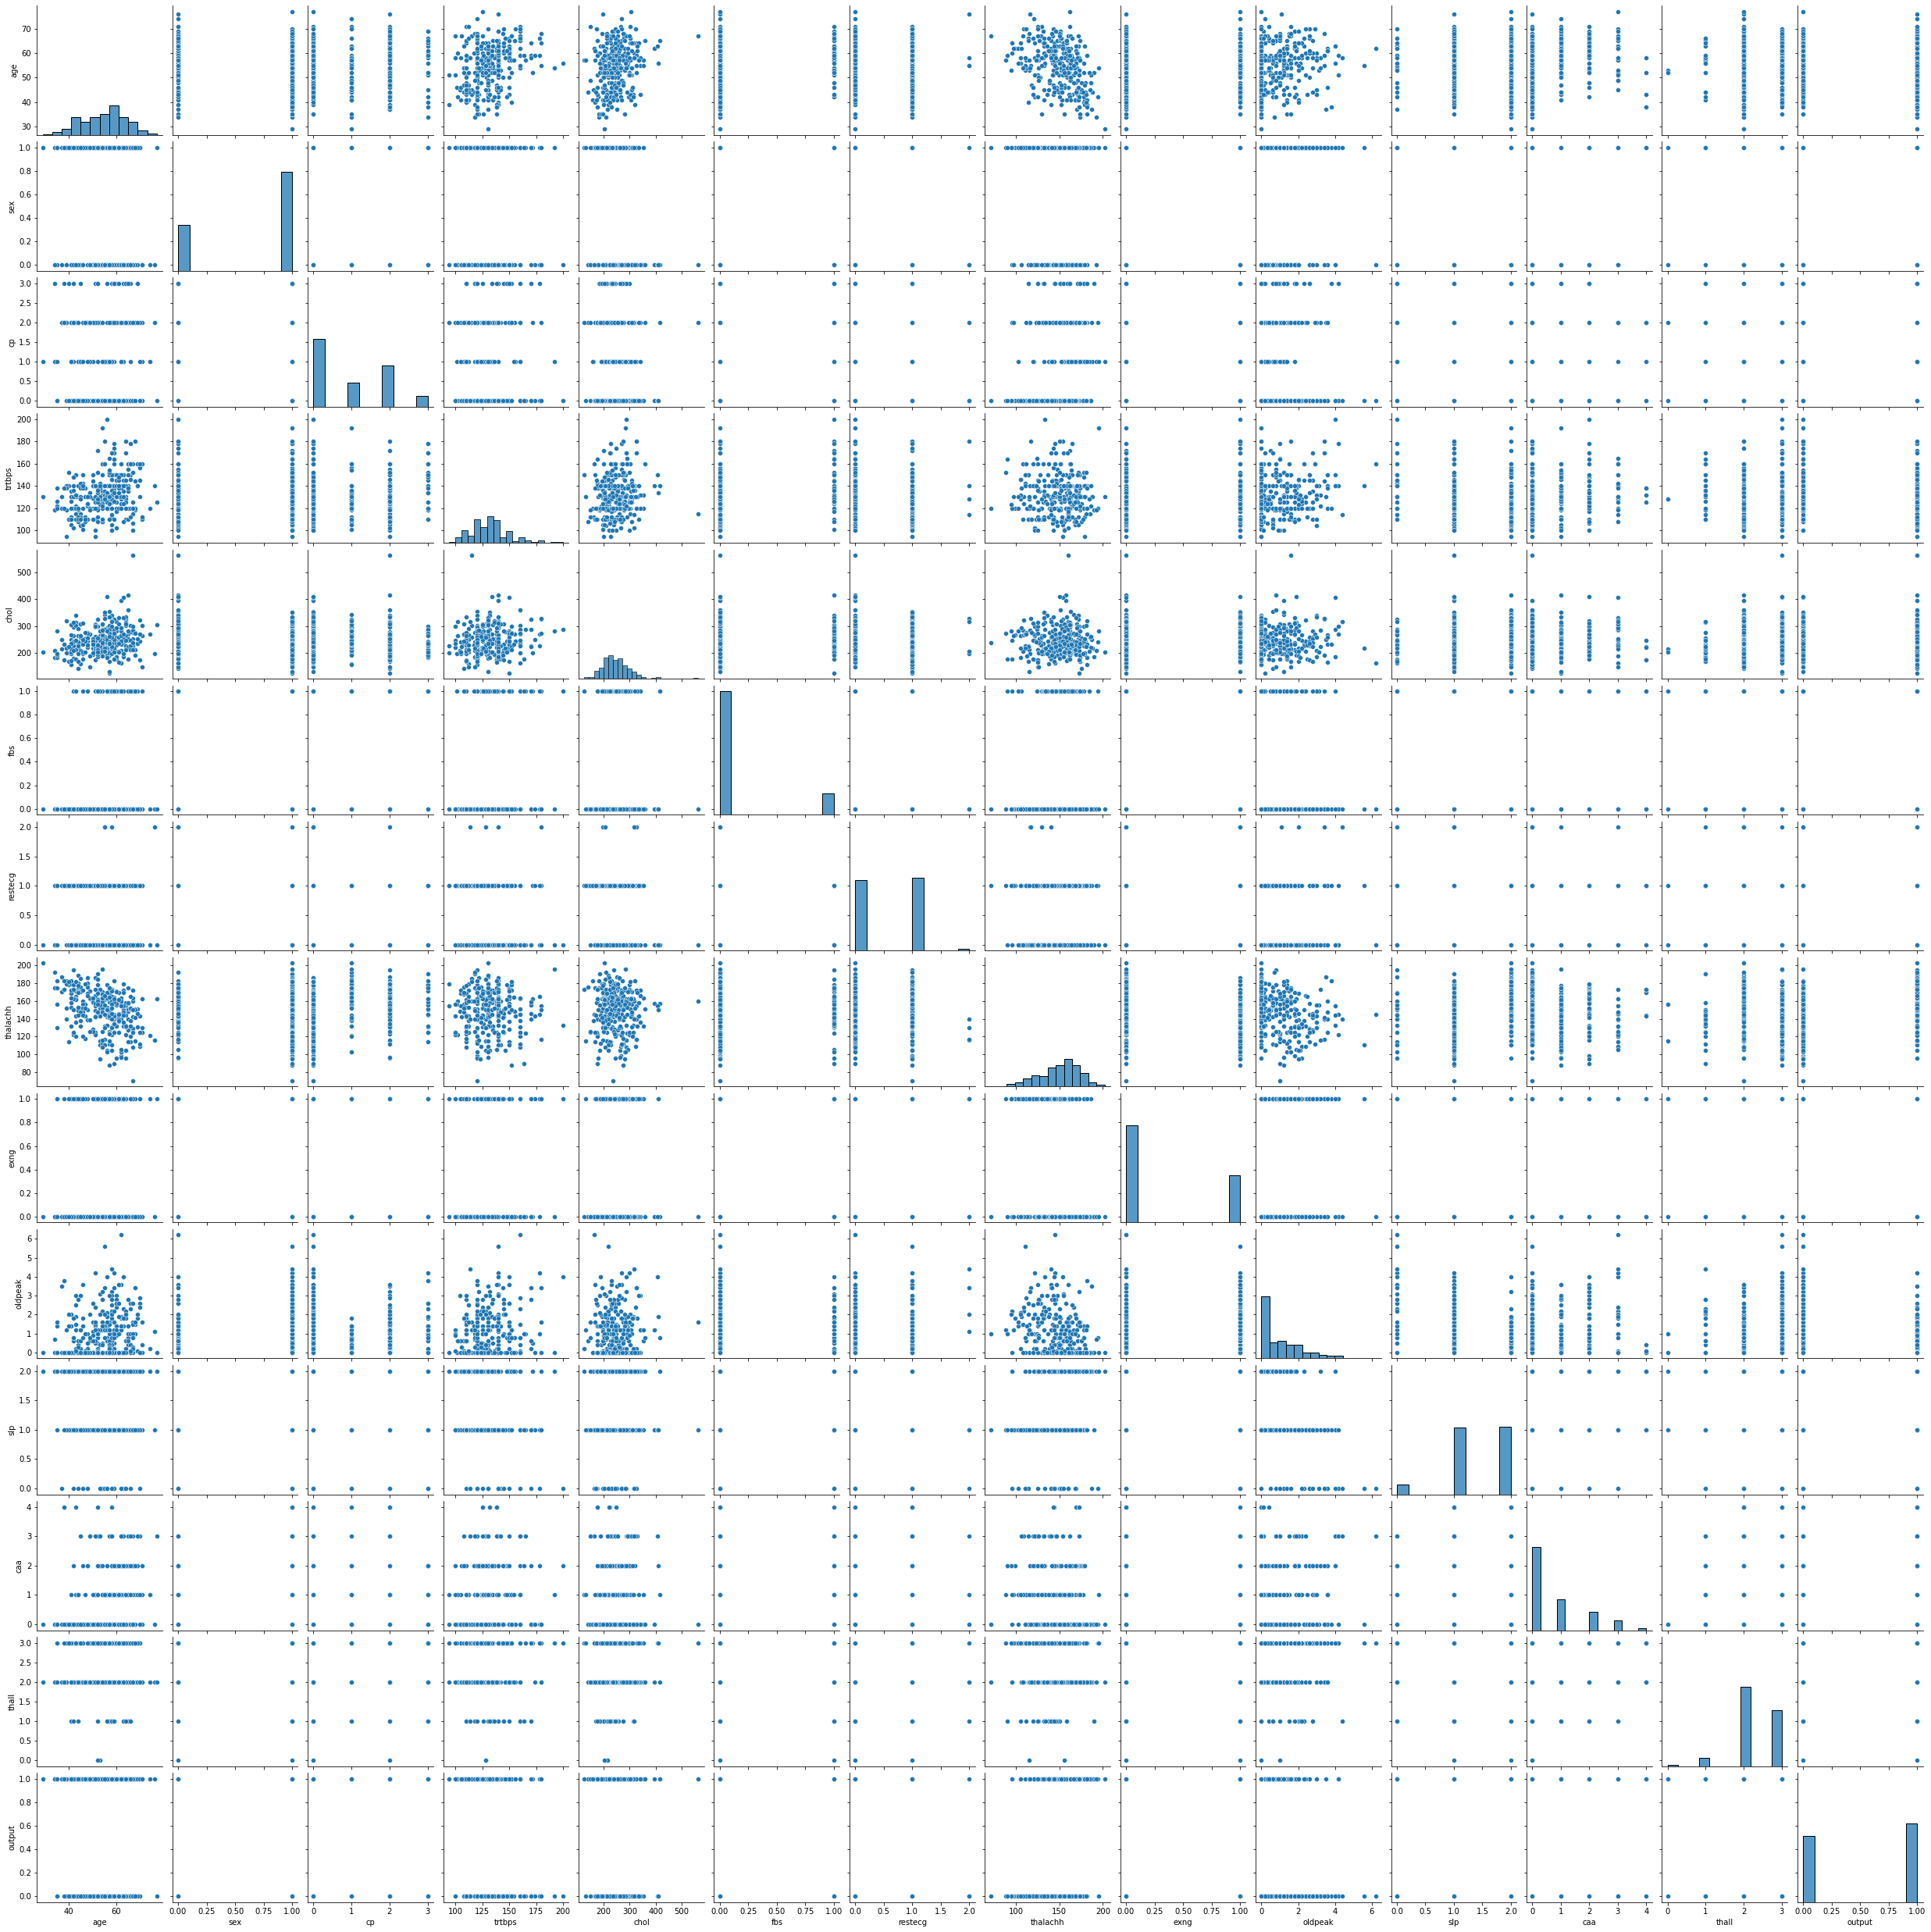

In [6]:
# Representar gráficamente las relaciones entre todas las parejas de las variables numéricas.
sns.pairplot(data)

# Bar plot.

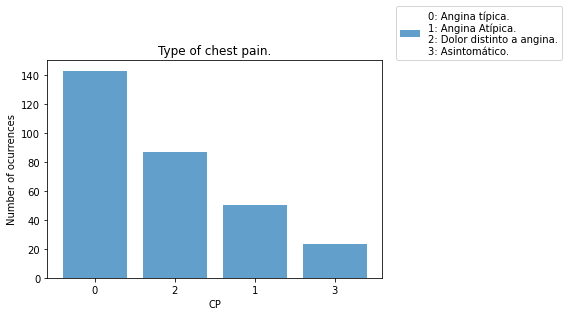

In [7]:
counts = data["cp"].value_counts()
bars = [str(x) for x in counts.index]
plt.bar(bars, counts, alpha=0.7)
plt.title("Type of chest pain.")
plt.ylabel("Number of ocurrences")
plt.xlabel("CP")
legend = ["0: Angina típica.\n1: Angina Atípica.\n2: Dolor distinto a angina.\n3: Asintomático."]
plt.legend(legend, loc=(1.04,1))

# Box plot y outliers.

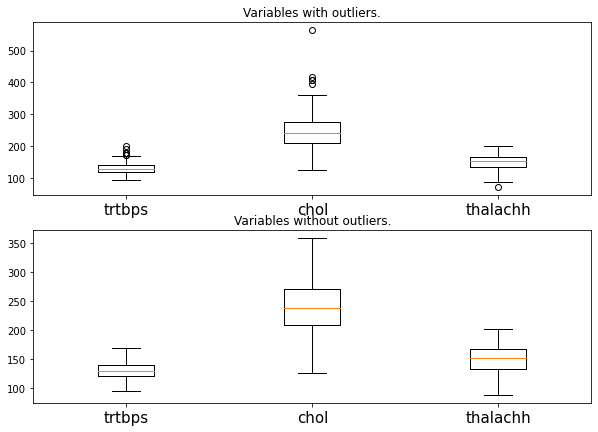

In [8]:
columns = ["trtbps", "chol", "thalachh"]
variable_data = data[columns]
# Obtener boxplot inicial. 
fig, (ax1, ax2) = plt.subplots(2, figsize =(10, 7))
box_plot = ax1.boxplot(variable_data)
# Obtener los outliers.
box_plot_data = {}
for key in box_plot.keys():
    box_plot_data[key] = [item.get_ydata() for item in box_plot[key]]
min_outlier1 = min(box_plot_data["fliers"][0])
min_outlier2 = min(box_plot_data["fliers"][1])
min_outlier3 = max(box_plot_data["fliers"][2])
# Eliminar los outliers
data = data[data[columns[0]] < min_outlier1]
data = data[data[columns[1]] < min_outlier2]
data = data[data[columns[2]] > min_outlier3]
variable_data1 = data[columns]
# Obtener el boxplot sin outliers.
box_plot1 = ax2.boxplot(variable_data1)
# Añadir labels.
ax1.set_xticks([1,2,3]) 
ax1.set_xticklabels(columns, fontsize=15)
ax1.title.set_text('Variables with outliers.')
ax2.set_xticks([1,2,3]) 
ax2.set_xticklabels(columns, fontsize=15)
ax2.title.set_text('Variables without outliers.')
plt.show()

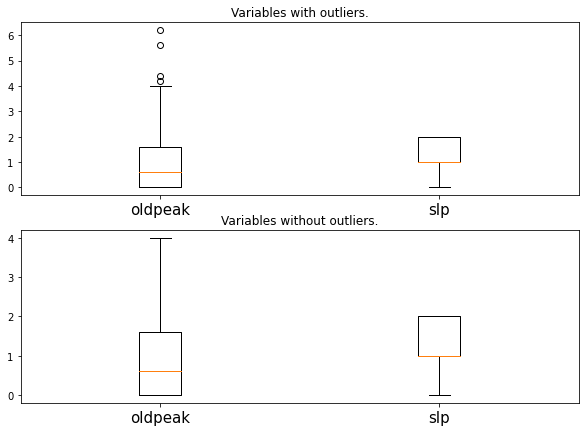

In [9]:
columns = ["oldpeak", "slp"]
variable_data = data[columns]
# Obtener boxplot inicial. 
fig, (ax1, ax2) = plt.subplots(2, figsize =(10, 7))
box_plot = ax1.boxplot(variable_data)
# Obtener los outliers.
box_plot_data = {}
for key in box_plot.keys():
    box_plot_data[key] = [item.get_ydata() for item in box_plot[key]]
min_outlier1 = min(box_plot_data["fliers"][0])
# Eliminar los outliers
data = data[data[columns[0]] < min_outlier1]
variable_data1 = data[columns]
# Obtener el boxplot sin outliers.
box_plot1 = ax2.boxplot(variable_data1)
# Añadir labels.
ax1.set_xticks([1,2]) 
ax1.set_xticklabels(columns, fontsize=15)
ax1.title.set_text('Variables with outliers.')
ax2.set_xticks([1,2]) 
ax2.set_xticklabels(columns, fontsize=15)
ax2.title.set_text('Variables without outliers.')
plt.show()

# Normalidad y homocedasticidad.

In [10]:
def print_normality(df, column):
    fig, (ax1, ax2) = plt.subplots(2, figsize =(10, 10))
    # Dibujar histograma.
    mu, sigma = stats.norm.fit(df[column])
    x_hat = np.linspace(df[column].min(), df[column].max(), num=100)
    y_hat = stats.norm.pdf(x_hat, mu, sigma)
    ax1.plot(x_hat, y_hat, linewidth=2, label='normal')
    ax1.hist(x=df[column], density=True, bins=30, color="#3182bd", alpha=0.5)
    ax1.plot(df[column], np.full_like(df[column], -0.01), '|k', markeredgewidth=1)
    ax1.set_title('{} distribution.'.format(column), fontsize = 10, fontweight = "bold")
    ax1.set_xlabel(column)
    ax1.set_ylabel('Probability density')
    ax1.legend()
    # Dibujar gráfico Q-Q.
    sm.qqplot(df[column], fit=True, line='q', alpha=0.4, lw=2,ax=ax2)
    ax2.set_title('Q-Q graphic of {}.'.format(column), fontsize = 10, fontweight = "bold")
    ax2.tick_params(labelsize = 7)
    
def get_normality(df, column, alpha=0.05):
    x = df[column]
    statistic, pvalue = stats.shapiro(x)
    statistic1, pvalue1 = stats.kstest(x, 'norm')
    print("- Test de saphiro para: '{}'".format(column))
    if pvalue < alpha:
        print("    Hipótesis nula rechazada (pvalue = {}): Los datos no cuentan con una distribución normal.".format(pvalue))
        if pvalue1 < alpha:
            print("    Del mismo modo, el test de Kolmogorov-Smirnov confirma lo anterior.")
        else:
            print("    Sin embargo, el test de Kolmogorov-Smirnov difiere de lo anterior.")
    else:
        print("    Hipótesis nula confirmada (pvalue = {}): Los datos cuentan con una distribución normal.".format(pvalue))
        if pvalue1 > alpha:
            print("    Del mismo modo, el test de Kolmogorov-Smirnov confirma lo anterior.")
        else:
            print("    Sin embargo, el test de Kolmogorov-Smirnov difiere de lo anterior.")
    return pvalue

def get_normality_and_homocedasticity_by_attack(df, column, alpha=0.05):
    pvalue1 = get_normality(df, column, alpha)
    data_no_attacks = df[df["output"] == 0][column]
    data_attacks = df[data["output"] == 1][column]
    if pvalue1 < alpha:
        statistic, pvalue = stats.fligner(data_attacks, data_no_attacks)
        print("- Test de Fligner-Killeen para '{}'.".format(column))
    else:
        statistic, pvalue = stats.levene(data_attacks, data_no_attacks)
        print("- Test de levene para {}.".format(column))
    if pvalue < alpha:
        print("    Hipótesis nula rechazada (pvalue = {}):".format(pvalue))
        print("        La variable '{}' presenta varianzas estadísticamente diferentes para los diferentes grupos de 'output'.".format(column))
    else:
        print("    Hipótesis nula confirmada (pvalue = {}):".format(pvalue))
        print("        La variable '{}' presenta varianzas estadísticamente iguales para los diferentes grupos de 'output'.".format(column))

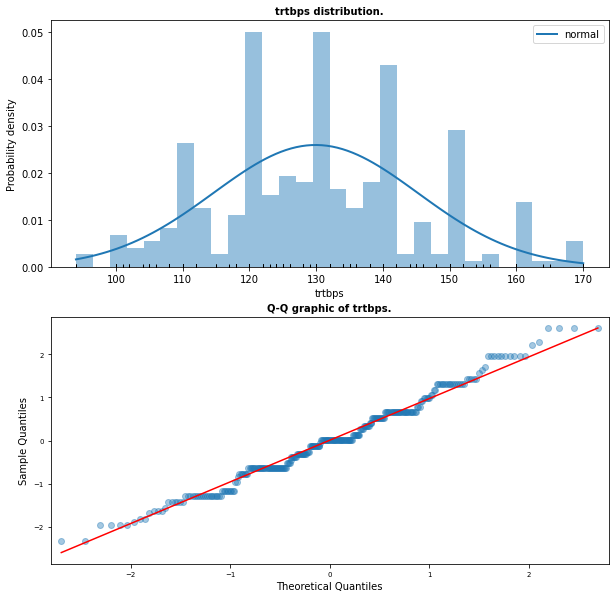

In [11]:
print_normality(data, "trtbps")

In [12]:
get_normality_and_homocedasticity_by_attack(data, "trtbps", alpha=0.05)

- Test de saphiro para: 'trtbps'
    Hipótesis nula rechazada (pvalue = 0.0032714386470615864): Los datos no cuentan con una distribución normal.
    Del mismo modo, el test de Kolmogorov-Smirnov confirma lo anterior.
- Test de Fligner-Killeen para 'trtbps'.
    Hipótesis nula confirmada (pvalue = 0.6320192204321309):
        La variable 'trtbps' presenta varianzas estadísticamente iguales para los diferentes grupos de 'output'.


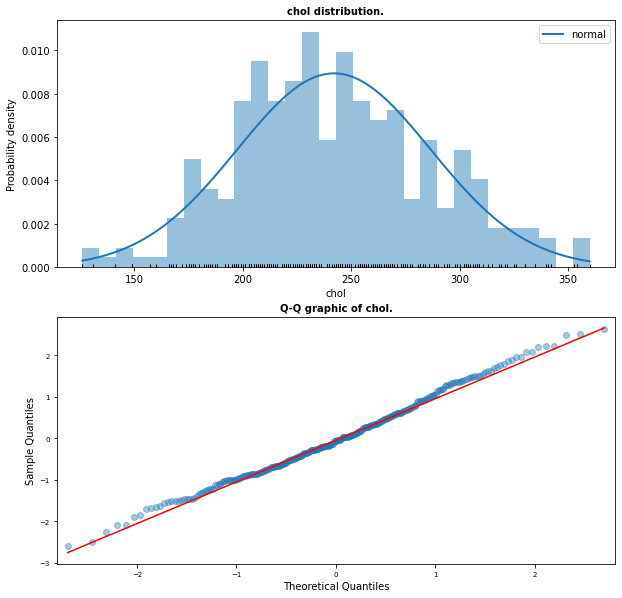

In [13]:
print_normality(data, "chol")

In [14]:
get_normality_and_homocedasticity_by_attack(data, "chol", alpha=0.05)

- Test de saphiro para: 'chol'
    Hipótesis nula confirmada (pvalue = 0.19093990325927734): Los datos cuentan con una distribución normal.
    Sin embargo, el test de Kolmogorov-Smirnov difiere de lo anterior.
- Test de levene para chol.
    Hipótesis nula confirmada (pvalue = 0.3385831547263919):
        La variable 'chol' presenta varianzas estadísticamente iguales para los diferentes grupos de 'output'.


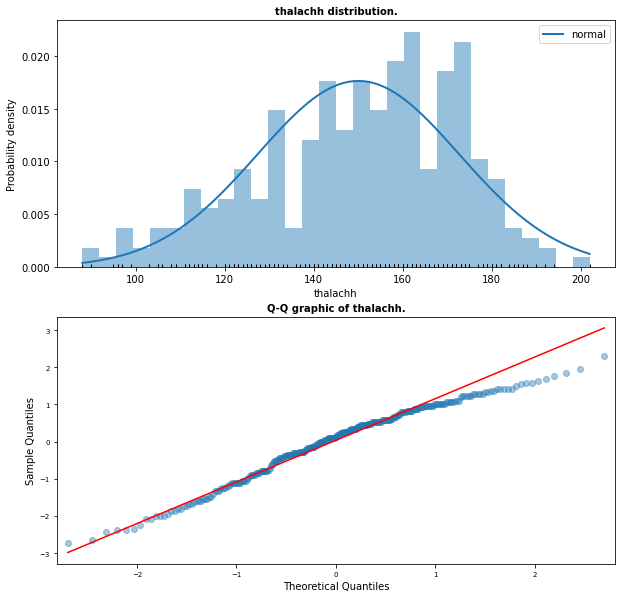

In [15]:
print_normality(data, "thalachh")

In [16]:
get_normality_and_homocedasticity_by_attack(data, "thalachh", alpha=0.05)

- Test de saphiro para: 'thalachh'
    Hipótesis nula rechazada (pvalue = 4.7278605052269995e-05): Los datos no cuentan con una distribución normal.
    Del mismo modo, el test de Kolmogorov-Smirnov confirma lo anterior.
- Test de Fligner-Killeen para 'thalachh'.
    Hipótesis nula confirmada (pvalue = 0.05583764124738319):
        La variable 'thalachh' presenta varianzas estadísticamente iguales para los diferentes grupos de 'output'.


# Contraste de hipótesis.

In [17]:
def difference_box_plot(df, df1, column):
    # Obtener los datos a representar.
    columns = [column, "null_column"]
    columns1 = ["null_column", column]
    df["null_column"] = np.nan
    df1["null_column"] = np.nan
    xticks = [column + "_no_attack", column + "_attack"]
    # Obtener boxplot inicial. 
    fig, ax1 = plt.subplots(1, figsize =(10, 7))
    # Pintar los datos con menos probabilidad de ataques.
    ax1.boxplot(df[columns])
    # Pintar los datos con menos probabilidad de ataques.
    ax1.boxplot(df1[columns1])
    # Añadir labels.
    ax1.set_xticks([1,2]) 
    ax1.set_xticklabels(xticks, fontsize=15)
    ax1.set_title("'{}' box plot.".format(column), fontsize = 15, fontweight = "bold")
    plt.show()
    print("La variable '{}' oscila entre los valores {:.1f} y {:.1f} con un valor medio de {:.2f} para el caso de las personas con menor probabilidad de sufrir un ataque.".format(column, df.describe()[column].iloc[3], df.describe()[column].iloc[7], df.describe()[column].iloc[1]))
    print("La variable '{}' oscila entre los valores {:.1f} y {:.1f} con un valor medio de {:.2f} para el caso de las personas con mayor probabilidad de sufrir un ataque.".format(column, df1.describe()[column].iloc[3], df1.describe()[column].iloc[7], df1.describe()[column].iloc[1]))

def density_histogram(df, df1, column, name):
    # Obtener los datos a representar.
    columns = ["output", column]
    # Realizar el histograma y poner los títulos, leyendas y labels.
    plt.hist(x = df[columns[1]], alpha = 0.5, color = 'tab:blue', density = True, label = "{} en  personas con mayor prob. de ataque.".format(name))
    plt.hist(x = df1[columns[1]], alpha = 0.5, color = 'tab:orange', density = True, label = "{} en  personas con menor prob. de ataque".format(name))
    plt.title('Valor de ' + columns[1] + ' en función de la variable ' + columns[0], fontsize = 10, fontweight = "bold")
    plt.xlabel('Nivel de {}'.format(name.lower()))
    plt.ylabel('Densidad de probabilidad')
    # Representar el histograma.
    plt.legend(loc=(1.04,1))
    
def t_student_test(sample1, sample2, type, equal_vars=False, alpha=0.05):
    statistic, pvalue =  stats.ttest_ind(sample1, sample2, equal_var=equal_vars, alternative=type)
    if pvalue < alpha:
        print("Hipótesis nula rechazada (pvalue = {}):".format(pvalue))
        print("    Se puede concluir que en promedio el valor de la primera muestra es mayor que el de la segunda.".format(columns[0], columns[1]))
    else:
        print("Hipótesis nula confirmada (pvalue = {}):".format(pvalue))
        print("    Se puede concluir que en promedio el valor de la primera muestra es menor o igual que el de la segunda.".format(columns[0], columns[1]))

def mann_whitney_test(sample1, sample2, type, alpha=0.05):
    statistic, pvalue =  stats.mannwhitneyu(sample1, sample2, alternative=type)
    if pvalue < alpha:
        print("Hipótesis nula rechazada (pvalue = {}):".format(pvalue))
        print("    Se puede concluir que en promedio el valor de la primera muestra es mayor que el de la segunda.".format(columns[0], columns[1]))
    else:
        print("Hipótesis nula confirmada (pvalue = {}):".format(pvalue))
        print("    Se puede concluir que en promedio el valor de la primera muestra es menor o igual que el de la segunda.".format(columns[0], columns[1]))

In [18]:
data_no_attacks = data[data["output"] == 0]
data_attacks = data[data["output"] == 1]

## Presión arterial en reposo

Una pregunta interesante que se podría responder es la siguiente:

<strong>¿Podemos concluir que las personas con más probabilidad de sufrir un ataque tienen un valor medio de presión arterial en reposo mayor que las que tienen menos probabilidad?</strong>

Puesto que se ha comprobado que los datos de presión arterial en reposo no cuentan con una distribución normal pero sí con una varianza estadísticamente igual para los diferentes grupos de 'output', se trataría de una comparación de medias en poblaciones independientes mediante la prueba no paramétrica de Mann-Whitney:

$H0 : μ1 \leq μ2$

$H1 : μ1 > μ2$

donde μ1 denota la media de la presión arterial para las personas con mayor probabilidad de sufrir un ataque y μ2 la de las personas con menor probabilidad de sufrirlo.

Primero se podría comprobar visualmente si se podría cumplir la hipótesis.



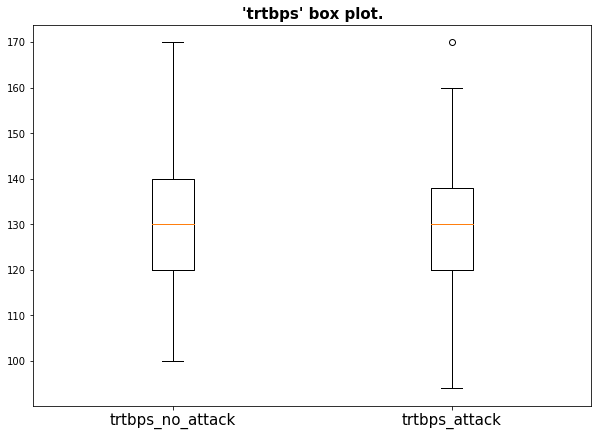

La variable 'trtbps' oscila entre los valores 100.0 y 170.0 con un valor medio de 131.88 para el caso de las personas con menor probabilidad de sufrir un ataque.
La variable 'trtbps' oscila entre los valores 94.0 y 170.0 con un valor medio de 128.36 para el caso de las personas con mayor probabilidad de sufrir un ataque.


In [19]:
column = "trtbps"
difference_box_plot(data_no_attacks, data_attacks, column)

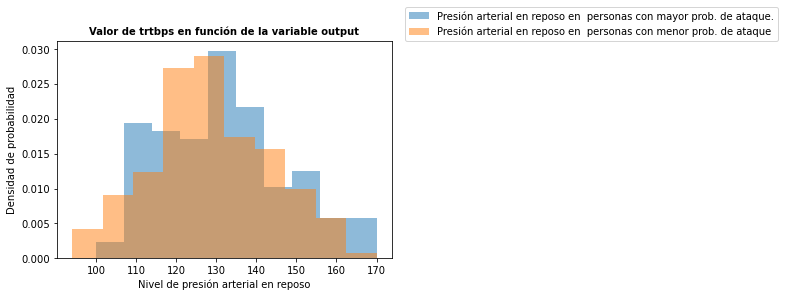

In [20]:
name = "Presión arterial en reposo"
density_histogram(data_no_attacks, data_attacks, column, name)

En principio se puede observar cómo la presión arterial en reposo suele tener el rango intercuartílico, es decir, el 50% de los valores en rangos muy similiares, lo mismo que ocurre en el caso de sus valores medios. Sin embargo, se puede observar como para el caso de las personas con mayor probabilidad de sufrir un ataque, al tener un rango intercuartílico menor, existe un valor outlier, que en este caso no será necesario eliminarlo, pero ha aumentado la media de este último caso. En definitiva, de estos gráficos, se puede observar que lo más probable es que el contraste de hipótesis determine que el valor medio sea igual o menor para el caso de las personas con mayor probabilidad de sufrir un ataque que para el de las que tienen menos. Es por ello que, a continuación, se procederá a realizar el test para ver si los gráficos nos han aportado una información útil o no.

In [21]:
mann_whitney_test(data_attacks[column], data_no_attacks[column], type="greater", alpha=0.05)

Hipótesis nula confirmada (pvalue = 0.9515975190585272):
    Se puede concluir que en promedio el valor de la primera muestra es menor o igual que el de la segunda.


<strong>Respuesta:</strong>
    
Puesto que el pvalor del test (<strong>$0.95159$</strong>) es muy cercano a <strong>$1$</strong> y por lo tanto muy superior al nivel de significación (<strong>$0.05$</strong>) no se puede descartar la hipótesis nula y podemos concluir que en promedio la presión arterial en reposo es menor o igual en el caso de las personas con mayor probabilidad de sufrir un ataque que en el caso de las que tienen menos probabilidades.

## Colesterol

Del mismo modo, otra pregunta interesante que se podría responder es la siguiente:

<strong>¿Podemos concluir que las personas con más probabilidad de sufrir un ataque tienen un valor medio de colesterol mayor que las que tienen menos probabilidad?</strong>

Puesto que se ha comprobado que los datos de colesterol cuentan con una distribución normal y además con una varianza estadísticamente igual para los diferentes grupos de 'output', se trataría de una comparación de medias en poblaciones normales independientes mediante la prueba paramétrica t de Student:

$H0 : μ1 \leq μ2$

$H1 : μ1 > μ2$

donde μ1 denota la media del colesterol para las personas con mayor probabilidad de sufrir un ataque y μ2 la de las personas con menor probabilidad de sufrirlo.

Primero se podría comprobar visualmente si se podría cumplir la hipótesis.



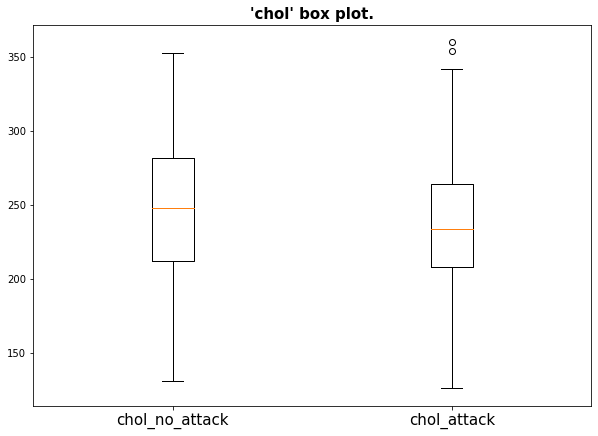

La variable 'chol' oscila entre los valores 131.0 y 353.0 con un valor medio de 247.61 para el caso de las personas con menor probabilidad de sufrir un ataque.
La variable 'chol' oscila entre los valores 126.0 y 360.0 con un valor medio de 237.73 para el caso de las personas con mayor probabilidad de sufrir un ataque.


In [22]:
column = "chol"
difference_box_plot(data_no_attacks, data_attacks, column)

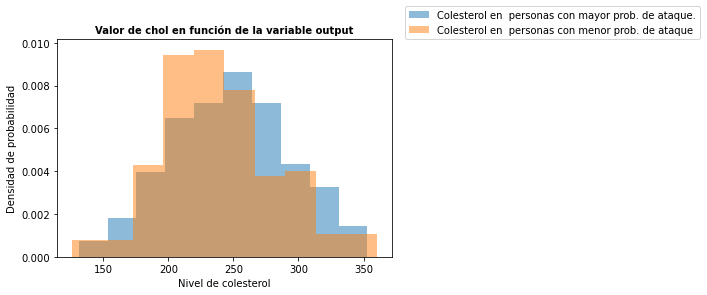

In [23]:
name = "Colesterol"
density_histogram(data_no_attacks, data_attacks, column, name)

En principio se puede observar cómo el colesterol también suele tener el rango intercuartílico en rangos muy similiares, lo mismo que ocurre en el caso de sus valores medios. Sin embargo, también se puede observar, al igual que en el caso anterior, como para el caso de las personas con mayor probabilidad de sufrir un ataque, al tener un rango intercuartílico menor, existen dos valores outliers, que tampoco será necesario eliminar, pero que aumentan la media de este último caso. En definitiva, de estos gráficos, se puede observar que lo más probable es que el contraste de hipótesis determine que el valor medio sea igual o menor para el caso de las personas con mayor probabilidad de sufrir un ataque que para el de las que tienen menos. Es por ello que, a continuación, se procederá a realizar el test para ver si los gráficos nos han aportado una información úitil o no.

In [24]:
t_student_test(data_attacks[column], data_no_attacks[column], type="greater", equal_vars=True, alpha=0.05)

Hipótesis nula confirmada (pvalue = 0.967640934520844):
    Se puede concluir que en promedio el valor de la primera muestra es menor o igual que el de la segunda.


<strong>Respuesta:</strong>
    
Puesto que el pvalor del test (<strong>$0.96764$</strong>) es muy cercano a <strong>$1$</strong> y por lo tanto muy superior al nivel de significación (<strong>$0.05$</strong>) no se puede descartar la hipótesis nula y podemos concluir que en promedio el colesterol es menor o igual en el caso de las personas con mayor probabilidad de sufrir un ataque que en el caso de las que tienen menos probabilidades.

## Máxima frecuencia cardíaca

La última pregunta que contestaremos es la siguiente:

<strong>¿Podemos concluir que las personas con más probabilidad de sufrir un ataque tienen un valor medio de máxima frecuencia cardíaca mayor que las que tienen menos probabilidad?</strong>

Puesto que se ha comprobado que los datos de máxima frecuencia cardíaca no cuentan con una distribución normal pero sí con una varianza estadísticamente iguale para los diferentes grupos de 'output', se trataría de una comparación de medias en poblaciones independientes mediante, al igual que en el primer caso, la prueba no paramétrica de Mann-Whitney:

$H0 : μ1 \leq μ2$

$H1 : μ1 > μ2$

donde μ1 denota la media de la máxima frecuencia cardíaca para las personas con mayor probabilidad de sufrir un ataque y μ2 la de las personas con menor probabilidad de sufrirlo.

Primero se podría comprobar visualmente si se podría cumplir la hipótesis.



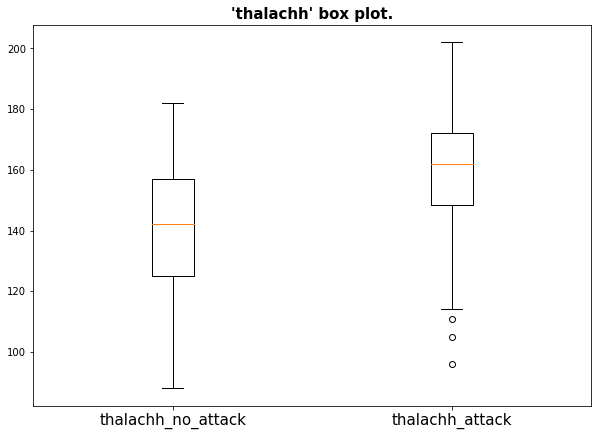

La variable 'thalachh' oscila entre los valores 88.0 y 182.0 con un valor medio de 139.20 para el caso de las personas con menor probabilidad de sufrir un ataque.
La variable 'thalachh' oscila entre los valores 96.0 y 202.0 con un valor medio de 158.57 para el caso de las personas con mayor probabilidad de sufrir un ataque.


In [25]:
column = "thalachh"
difference_box_plot(data_no_attacks, data_attacks, column)

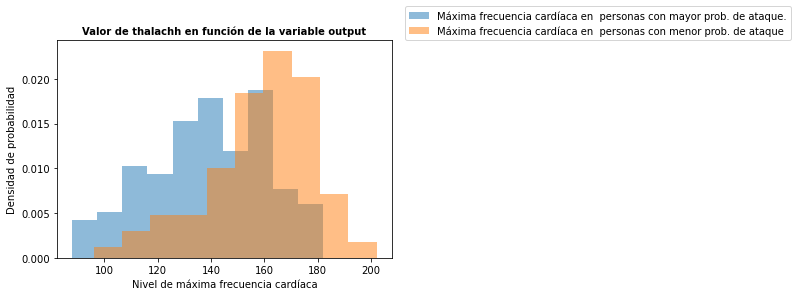

In [26]:
name = "Máxima frecuencia cardíaca"
density_histogram(data_no_attacks, data_attacks, column, name)

En principio se puede observar como la máxima frecuencia cardíaca tiene en este caso una mayor diferencia en el rango intercuartílico entre los dos tipos de persona, lo mismo que ocurre en el caso de sus valores medios. Además, se puede ver cómo para el caso de las personas con mayor probabilidad de sufrir un ataque cardíaco existen dos valores outliers por la zona inferior los cuales reducen el valor medio de este caso, por lo tanto, la diferencia entre las medias podría ser un poco superior. En definitiva, de estos gráficos, se puede observar que lo más probable es que el contraste de hipótesis determine que el valor medio sea mayor para el caso de las personas con mayor probabilidad de sufrir un ataque que para el de las que tienen menos. Es por ello que, a continuación, se procederá a realizar el test para ver si los gráficos nos han aportado una información útil o no.

In [27]:
mann_whitney_test(data_attacks[column], data_no_attacks[column], type="greater", alpha=0.05)

Hipótesis nula rechazada (pvalue = 3.205837278574698e-13):
    Se puede concluir que en promedio el valor de la primera muestra es mayor que el de la segunda.


<strong>Respuesta:</strong>
    
Puesto que el pvalor del test (<strong>$3.2058x10^{-13}$</strong>) es muy cercano a <strong>$0$</strong> y por lo tanto muy inferior al nivel de significación (<strong>$0.05$</strong>) se puede descartar la hipótesis nula y podemos concluir que en promedio la máxima frecuencia cardíaca es mayor en el caso de las personas con mayor probabilidad de sufrir un ataque que en el caso de las que tienen menos probabilidades.

# Regresión. 

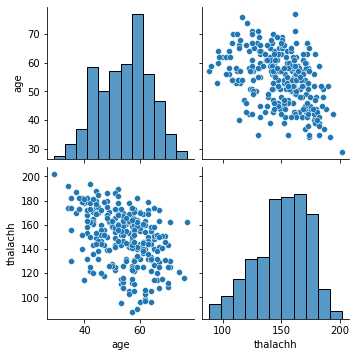

In [28]:
data1 = data[["age", "thalachh"]]
sns.pairplot(data1)

In [29]:
# Preparar el formato de los datos de entrada.
age = data1["age"].to_numpy().reshape(-1, 1)
trtbps = data1["thalachh"].to_numpy()
# Creación y entrenamiento del modelo.
model = LinearRegression()
model.fit(age, trtbps)
trtbps_pred = model.predict(age)
r_sq = model.score(age, trtbps)
intercept = model.intercept_
slope = model.coef_[0]
print("coefficient of determination: {}".format(r_sq))
print("intercept: {}".format(intercept))
print("slope: {}".format(slope))

coefficient of determination: 0.17172747111710984
intercept: 205.46249910318983
slope: -1.0264347036197934


Por tanto, la recta que definiría al modelo es la siguiente:
$y = 205.46-1.0264x$

In [30]:
print("Valor predicho con el modelo: {}".format(model.predict(np.array(30).reshape(-1, 1))[0]))
print("Valor predicho con el la recta: {}".format(intercept + (slope * 30)))

Valor predicho con el modelo: 174.66945799459603
Valor predicho con el la recta: 174.66945799459603


Text(0, 0.5, 'thalachh')

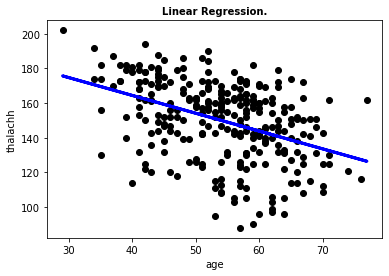

In [31]:
plt.scatter(age, trtbps, color="black")
plt.plot(age, trtbps_pred, color="blue", linewidth=3)
plt.title('Linear Regression.'.format(column), fontsize = 10, fontweight = "bold")
plt.xlabel("age")
plt.ylabel("thalachh")

# Clasificación.

In [32]:
def confusion_matrix(model, x, y, mode):
    class_names = [0, 1]
    if mode == "train":
        title = "Training confusion matrix."
    else:
        title = "Testing confusion matrix."
    display = ConfusionMatrixDisplay.from_estimator(
            model,
            x,
            y,
            display_labels=class_names,
            cmap=plt.cm.Blues,
            normalize=None,
        )
    display.ax_.set_title(title)

def model_predict(model, x, y):
    predicts = model.predict(x)
    # Creación de dataframe para resultados e introducción deL primer resultado.
    results = pd.DataFrame()
    results['y_real'] =  y
    results['y_pred'] =  pd.Series(predicts)
    results['error'] =  np.where(results['y_real'] == results['y_pred'], 0, 1)
    # Devolución de los resultados.
    print("Se han obtenido {} errores de un total de {} casos, es decir, un {:.3f}% de acierto.".format(np.sum(results['error']), 
                                                                                                    len(results), 
                                                                                                    (1- (np.sum(results['error'])/len(results)))*100))
    print('Media del error absoluto (MAE) {0:.3f}'.format(np.mean(results['error'])))
    print('Desviación típica del error obtenido: {0:.3f}'.format(np.std(results['error'])))
    R2 = r2_score(y, predicts)
    print('Puntuación de R2: ' + str(R2))
    return predicts, results

In [33]:
features_columns = data.columns[:-1]
x_train, x_test, y_train, y_test = train_test_split(data[features_columns], data["output"], test_size=0.2, random_state=42)
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
# Creación del modelo.
model = LogisticRegression()
# Entrenamiento.
model.fit(x_train, y_train)

LogisticRegression()

In [34]:
train_predicts, train_results = model_predict(model, x_train, y_train)
print()
train_results.head()

Se han obtenido 33 errores de un total de 227 casos, es decir, un 85.463% de acierto.
Media del error absoluto (MAE) 0.145
Desviación típica del error obtenido: 0.352
Puntuación de R2: 0.40885416666666663



,y_real,y_pred,error
0,0,1,1
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


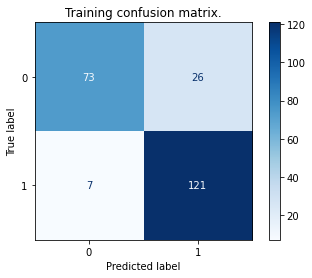

In [35]:
confusion_matrix(model=model, x=x_train, y=y_train, mode="train")

In [36]:
test_predicts, test_results = model_predict(model, x_test, y_test)
print()
test_results.head()

Se han obtenido 7 errores de un total de 57 casos, es decir, un 87.719% de acierto.
Media del error absoluto (MAE) 0.123
Desviación típica del error obtenido: 0.328
Puntuación de R2: 0.5049627791563276



,y_real,y_pred,error
0,1,1,0
1,0,0,0
2,1,1,0
3,0,0,0
4,1,1,0


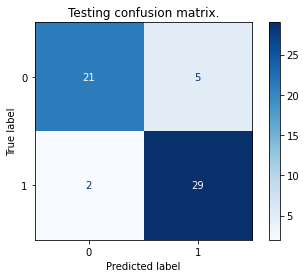

In [37]:
confusion_matrix(model=model, x=x_test, y=y_test, mode="test")